# .<p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis - Gdz Elektrik Datathon (Aug 2022)</p>

## .<p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Case-2</p>

**Expectation**: Prediction of call center requests arising from unplanned power outages

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

from skimpy import clean_columns
from skimpy import skim
import scipy.stats as stats
import re

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Reading the **Train** Data

In [18]:
df0 = pd.read_csv("case2_train.csv")
df = df0.copy()

In [19]:
df.head(2).T

,0,1
KESİNTİ_NO,2225427,1885097
İL,İZMİR,İZMİR
İLÇE,ÇEŞME,ÇEŞME
ŞEBEKE_UNSURU,AG Fideri,Abone Tesisi
ŞEBEKE_UNSURU_KODU,L-36 35-18-L00036__72410820_72410820,L-356 BAŞKENT SİTESİ 35-18-L00356_950455448_95...
KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA,AG Tel Kopuğu,AG Havai Branşman Arızası
KAYNAĞA_GÖRE,Dağıtım-AG,Dağıtım-AG
SÜREYE_GÖRE,Uzun,Uzun
SEBEBE_GÖRE,Şebeke işletmecisi,Şebeke işletmecisi
BİLDİRİME_GÖRE,Bildirimsiz,Bildirimsiz


In [20]:
df.tail(2).T

,23156,23157
KESİNTİ_NO,2073408,1817853
İL,MANİSA,İZMİR
İLÇE,SALİHLİ,ÇEŞME
ŞEBEKE_UNSURU,AG Fideri,OG Fideri
ŞEBEKE_UNSURU_KODU,TR-36 45-78-L00036_B_56387040_56387040,ALAÇATI TM 35-18-A00005_HatBaşıAyırıcı_5313828...
KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA,AG Pano Kol Sigorta Atığı,OG Sigorta Atması
KAYNAĞA_GÖRE,Dağıtım-AG,Dağıtım-OG
SÜREYE_GÖRE,Uzun,Uzun
SEBEBE_GÖRE,Şebeke işletmecisi,Şebeke işletmecisi
BİLDİRİME_GÖRE,Bildirimsiz,Bildirimsiz


In [21]:
df.shape

(23158, 26)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   KESİNTİ_NO                         23158 non-null  int64  
 1   İL                                 23158 non-null  object 
 2   İLÇE                               23158 non-null  object 
 3   ŞEBEKE_UNSURU                      23158 non-null  object 
 4   ŞEBEKE_UNSURU_KODU                 23158 non-null  object 
 5   KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA  23158 non-null  object 
 6   KAYNAĞA_GÖRE                       23158 non-null  object 
 7   SÜREYE_GÖRE                        23158 non-null  object 
 8   SEBEBE_GÖRE                        23158 non-null  object 
 9   BİLDİRİME_GÖRE                     23158 non-null  object 
 10  BAŞLAMA_TARİHİ_VE_ZAMANI           23158 non-null  object 
 11  SONA_ERME_TARİHİ_VE_ZAMANI         23158 non-null  obj

Cleaning column names with `skimpy.clean_columns`

In [23]:
df = clean_columns(df)
print(df.columns)

25 column names have been cleaned

Index(['kesinti_no', 'il', 'ilce', 'sebeke_unsuru', 'sebeke_unsuru_kodu',
       'kesinti_nedenine_iliskin_aciklama', 'kaynaga_gore', 'sureye_gore',
       'sebebe_gore', 'bildirime_gore', 'baslama_tarihi_ve_zamani',
       'sona_erme_tarihi_ve_zamani', 'kesinti_suresi', 'kentsel_og',
       'kentsel_ag', 'kentalti_og', 'kentalti_ag', 'kirsal_og', 'kirsal_ag',
       'toplam_kentsel_og', 'toplam_kentsel_ag', 'toplam_kentalti_og',
       'toplam_kentalti_ag', 'toplam_kirsal_og', 'toplam_kirsal_ag',
       'cagri_count'],
      dtype='object')


In [24]:
df.columns

Index(['kesinti_no', 'il', 'ilce', 'sebeke_unsuru', 'sebeke_unsuru_kodu',
       'kesinti_nedenine_iliskin_aciklama', 'kaynaga_gore', 'sureye_gore',
       'sebebe_gore', 'bildirime_gore', 'baslama_tarihi_ve_zamani',
       'sona_erme_tarihi_ve_zamani', 'kesinti_suresi', 'kentsel_og',
       'kentsel_ag', 'kentalti_og', 'kentalti_ag', 'kirsal_og', 'kirsal_ag',
       'toplam_kentsel_og', 'toplam_kentsel_ag', 'toplam_kentalti_og',
       'toplam_kentalti_ag', 'toplam_kirsal_og', 'toplam_kirsal_ag',
       'cagri_count'],
      dtype='object')

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
kesinti_no,23158.000,2063632.720,184604.854,1805940.000,1857583.000,2138753.500,2225197.500,2315913.000
kesinti_suresi,23158.000,2.348,2.615,0.002,0.957,1.720,3.017,170.722
kentsel_og,23158.000,7.286,34.351,0.000,0.000,0.000,0.000,903.000
kentsel_ag,23158.000,353.448,1671.025,0.000,0.000,4.000,88.000,47916.000
kentalti_og,23158.000,0.987,10.826,0.000,0.000,0.000,0.000,728.000
kentalti_ag,23158.000,47.215,460.287,0.000,0.000,0.000,0.000,24331.000
kirsal_og,23158.000,1.927,14.225,0.000,0.000,0.000,0.000,446.000
kirsal_ag,23158.000,49.839,308.814,0.000,0.000,0.000,0.000,11673.000
toplam_kentsel_og,23158.000,7.408,49.108,0.000,0.000,0.000,0.000,2208.803
toplam_kentsel_ag,23158.000,308.204,1539.129,0.000,0.000,7.388,125.346,65746.008


> usually standard deviations are higher than means. Expect extreme values.

In [26]:
df.describe(include="O").T

,count,unique,top,freq
il,23158,2,İZMİR,16082
ilce,23158,47,ÇEŞME,1345
sebeke_unsuru,23158,8,Abone Tesisi,8056
sebeke_unsuru_kodu,23158,18666,ÇAMLIK DM 35-17-M00173_ZEYTİNDAĞ-1 M08_66328132,18
kesinti_nedenine_iliskin_aciklama,23158,62,AG Havai Branşman Arızası,4347
kaynaga_gore,23158,3,Dağıtım-AG,16461
sureye_gore,23158,2,Uzun,22703
sebebe_gore,23158,3,Şebeke işletmecisi,22708
bildirime_gore,23158,1,Bildirimsiz,23158
baslama_tarihi_ve_zamani,23158,23100,15.01.2022 09:41:36,3


In [27]:
df.isnull().sum()

kesinti_no                           0
il                                   0
ilce                                 0
sebeke_unsuru                        0
sebeke_unsuru_kodu                   0
kesinti_nedenine_iliskin_aciklama    0
kaynaga_gore                         0
sureye_gore                          0
sebebe_gore                          0
bildirime_gore                       0
baslama_tarihi_ve_zamani             0
sona_erme_tarihi_ve_zamani           0
kesinti_suresi                       0
kentsel_og                           0
kentsel_ag                           0
kentalti_og                          0
kentalti_ag                          0
kirsal_og                            0
kirsal_ag                            0
toplam_kentsel_og                    0
toplam_kentsel_ag                    0
toplam_kentalti_og                   0
toplam_kentalti_ag                   0
toplam_kirsal_og                     0
toplam_kirsal_ag                     0
cagri_count              

In [28]:
df.isnull().sum() / df.shape[0] * 100

kesinti_no                          0.000
il                                  0.000
ilce                                0.000
sebeke_unsuru                       0.000
sebeke_unsuru_kodu                  0.000
kesinti_nedenine_iliskin_aciklama   0.000
kaynaga_gore                        0.000
sureye_gore                         0.000
sebebe_gore                         0.000
bildirime_gore                      0.000
baslama_tarihi_ve_zamani            0.000
sona_erme_tarihi_ve_zamani          0.000
kesinti_suresi                      0.000
kentsel_og                          0.000
kentsel_ag                          0.000
kentalti_og                         0.000
kentalti_ag                         0.000
kirsal_og                           0.000
kirsal_ag                           0.000
toplam_kentsel_og                   0.000
toplam_kentsel_ag                   0.000
toplam_kentalti_og                  0.000
toplam_kentalti_ag                  0.000
toplam_kirsal_og                  

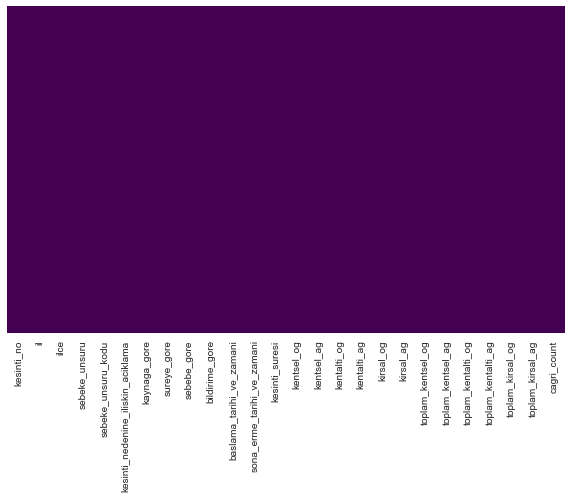

In [29]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [30]:
# df.isnull().sum()

isnull = pd.DataFrame(df.isnull().sum(), columns = ['isnull'])
isnull

,isnull
kesinti_no,0
il,0
ilce,0
sebeke_unsuru,0
sebeke_unsuru_kodu,0
kesinti_nedenine_iliskin_aciklama,0
kaynaga_gore,0
sureye_gore,0
sebebe_gore,0
bildirime_gore,0


In [31]:
# df.isnull().sum()*100 / df.shape[0]

percentage_null = round(pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns = ['percentage_null']),2)
percentage_null

,percentage_null
kesinti_no,0.000
il,0.000
ilce,0.000
sebeke_unsuru,0.000
sebeke_unsuru_kodu,0.000
kesinti_nedenine_iliskin_aciklama,0.000
kaynaga_gore,0.000
sureye_gore,0.000
sebebe_gore,0.000
bildirime_gore,0.000


In [32]:
# summary_null = pd.concat([df.isnull().sum().to_frame(), (df.isnull().sum()*100 / df.shape[0]).to_frame()], axis = 1).reset_index().rename({'index':'Columns'},axis = 1)
# summary_null

summary_null = pd.concat([isnull, percentage_null], axis = 1).reset_index().rename({'index':'Columns'},axis = 1)
summary_null

,Columns,isnull,percentage_null
0,kesinti_no,0,0.000
1,il,0,0.000
2,ilce,0,0.000
3,sebeke_unsuru,0,0.000
4,sebeke_unsuru_kodu,0,0.000
5,kesinti_nedenine_iliskin_aciklama,0,0.000
6,kaynaga_gore,0,0.000
7,sureye_gore,0,0.000
8,sebebe_gore,0,0.000
9,bildirime_gore,0,0.000


> no null values

In [33]:
object_col = df.select_dtypes(include='object').columns
object_col

Index(['il', 'ilce', 'sebeke_unsuru', 'sebeke_unsuru_kodu',
       'kesinti_nedenine_iliskin_aciklama', 'kaynaga_gore', 'sureye_gore',
       'sebebe_gore', 'bildirime_gore', 'baslama_tarihi_ve_zamani',
       'sona_erme_tarihi_ve_zamani'],
      dtype='object')

In [34]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("//"*20)

il
----------------
İZMİR     16082
MANİSA     7076
Name: il, dtype: int64
////////////////////////////////////////
ilce
----------------
ÇEŞME          1345
ÖDEMİŞ          973
KONAK           918
YUNUSEMRE       915
URLA            896
BORNOVA         840
SALİHLİ         815
MENDERES        781
AKHİSAR         773
TORBALI         765
TURGUTLU        694
ŞEHZADELER      689
KEMALPAŞA       673
ALAŞEHİR        638
BERGAMA         630
BUCA            623
KARABAĞLAR      613
MENEMEN         599
DİKİLİ          586
TİRE            557
SEFERİHİSAR     557
KARABURUN       542
KİRAZ           528
BAYINDIR        509
KARŞIYAKA       498
SARUHANLI       484
BAYRAKLI        446
SOMA            440
ALİAĞA          433
ÇİĞLİ           430
FOÇA            320
GÖRDES          310
KULA            270
SELENDİ         239
SARIGÖL         224
GAZİEMİR        220
KIRKAĞAÇ        186
GÜZELBAHÇE      166
KINIK           163
DEMİRCİ         162
SELÇUK          141
NARLIDERE       122
BEYDAĞ          117
KÖ

In [35]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 23158  │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 26     │ │ float64     │ 8     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 7     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name          ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0       ┃ p25      ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ kesinti_no           │   0 │     0 │  2100000 │  180000 │  1800000 │  1900000 │ 2200000 │ 2300000 │ █▂▁▂█▅ │  │
│ │ kesinti_suresi       │   0 │     0 │      2.3 │     2.6 │   0.0019 │     0.96 │       3 │     170 │   █    │  │
│ │ kentsel_og           │   0 │     0 │      7.3 │      34 │        0 │        0 │       0 │     900 │   █    │  │
│ │ kentsel_ag           │   0 │     0 │      350 │    1700 │        0 │        0 │      88 │   48000 │   █    │  │
│ │ kentalti_og          │   0 │     0 │     0.99 │      11 │        0 │        0 │       0 │     730 │   █    │  │
│ │ kentalti_ag          │   0 │     0 │       47 │     460 │        0 │        0 │       0 │   24000 │   █    │  │
│ │ kirsal_og            │   0 │     0 │      1.9 │      14 │        0 │        0 │       0 │     450 │   █    │  │
│ │ kirsal_ag            │   0 │     0 │       50 │     310 │        0 │        0 │       0 │   12000 │   █    │  │
│ │ toplam_kentsel_og    │   0 │     0 │      7.4 │      49 │        0 │        0 │       0 │    2200 │   █    │  │
│ │ toplam_kentsel_ag    │   0 │     0 │      310 │    1500 │        0 │        0 │     130 │   66000 │   █    │  │
│ │ toplam_kentalti_og   │   0 │     0 │     0.78 │      11 │        0 │        0 │       0 │     830 │   █    │  │
│ │ toplam_kentalti_ag   │   0 │     0 │       36 │     380 │        0 │        0 │       0 │   31000 │   █    │  │
│ │ toplam_kirsal_og     │   0 │     0 │      1.6 │      18 │        0 │        0 │       0 │    1400 │   █    │  │
│ │ toplam_kirsal_ag     │   0 │     0 │       41 │     300 │        0 │        0 │       0 │   13000 │   █    │  │
│ │ cagri_count          │   0 │     0 │      4.1 │      28 │        0 │        0 │       1 │    1200 │   █    │  │
│ └──────────────────────┴─────┴───────┴──────────┴─────────┴──────────┴──────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ il                                    │     0 │         0 │                        1 │               23000 │  │
│ │ ilce                                  │     0 │     

## .<p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">The Examination of Columns</p>

### **<span style='color:coral'> kesinti_no </span>** 

KOD_NO(Outage ID): CRM - Müşteri/abonenin aramalarını karşılayan sorumlu tarafından alınan çağrıya istinaden TSKS sisteminde açılan kesinti kaydına atanan benzersiz(unique) numaradır.

In [36]:
df.kesinti_no.value_counts(dropna=False)

2225427    1
2225088    1
1822581    1
1820844    1
2306007    1
          ..
1979854    1
2275178    1
1817922    1
2175320    1
1817853    1
Name: kesinti_no, Length: 23158, dtype: int64

In [37]:
df['kesinti_no'].nunique()

23158

> all unique values, ID for outage occurances

### **<span style='color:coral'> il </span>** 

Kesinti kaydının açıldığı şehri belirtir.

In [38]:
df.il.value_counts(dropna=False)

İZMİR     16082
MANİSA     7076
Name: il, dtype: Int64

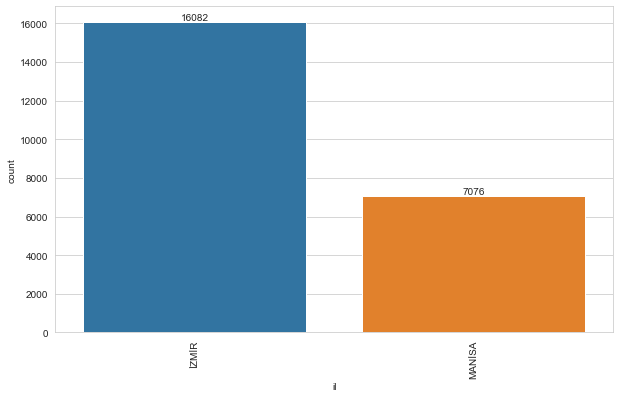

In [39]:
ax = sns.countplot(data=df, x="il")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

> **Izmir** has the highest number of outages, more than two times higher than **Manisa**.

### **<span style='color:coral'> ilce </span>** 

Kesinti kaydının açıldığı ilçeyi belirtir.

In [40]:
df.ilce.value_counts(dropna=False)

ÇEŞME          1345
ÖDEMİŞ          973
KONAK           918
YUNUSEMRE       915
URLA            896
BORNOVA         840
SALİHLİ         815
MENDERES        781
AKHİSAR         773
TORBALI         765
TURGUTLU        694
ŞEHZADELER      689
KEMALPAŞA       673
ALAŞEHİR        638
BERGAMA         630
BUCA            623
KARABAĞLAR      613
MENEMEN         599
DİKİLİ          586
TİRE            557
SEFERİHİSAR     557
KARABURUN       542
KİRAZ           528
BAYINDIR        509
KARŞIYAKA       498
SARUHANLI       484
BAYRAKLI        446
SOMA            440
ALİAĞA          433
ÇİĞLİ           430
FOÇA            320
GÖRDES          310
KULA            270
SELENDİ         239
SARIGÖL         224
GAZİEMİR        220
KIRKAĞAÇ        186
GÜZELBAHÇE      166
KINIK           163
DEMİRCİ         162
SELÇUK          141
NARLIDERE       122
BEYDAĞ          117
KÖPRÜBAŞI        96
BALÇOVA          91
AHMETLİ          78
GÖLMARMARA       63
Name: ilce, dtype: Int64

In [41]:
df.ilce.nunique()

47

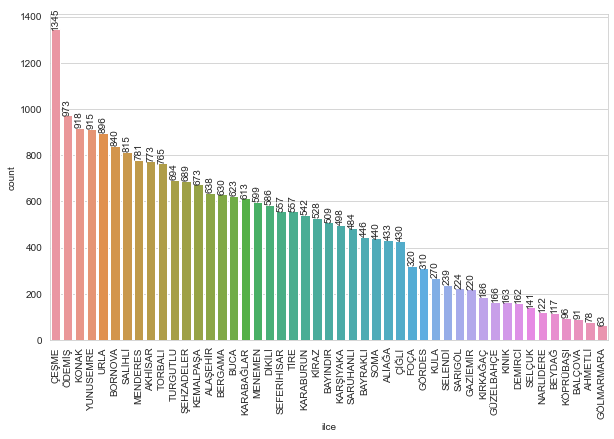

In [42]:
large_to_small = df.groupby('ilce').size().sort_values().index[::-1]
ax = sns.countplot(data=df, x="ilce", order=large_to_small)

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container, rotation = 90);

> **Cesme** has the highest number of outages

### **<span style='color:coral'> sebeke_unsuru </span>** 

Kesinti kaydı açılırken kesintinin olduğu şebeke unsurunu belirtir.

In [43]:
df.sebeke_unsuru.value_counts(dropna=False)

Abone Tesisi                 8056
AG Fideri                    5759
OG Fideri                    2540
DM                           2019
Dağıtım Transformatörü       1778
KÖK                          1661
Saha Dağıtım Kutusu (SDK)     867
TM Fideri                     478
Name: sebeke_unsuru, dtype: Int64

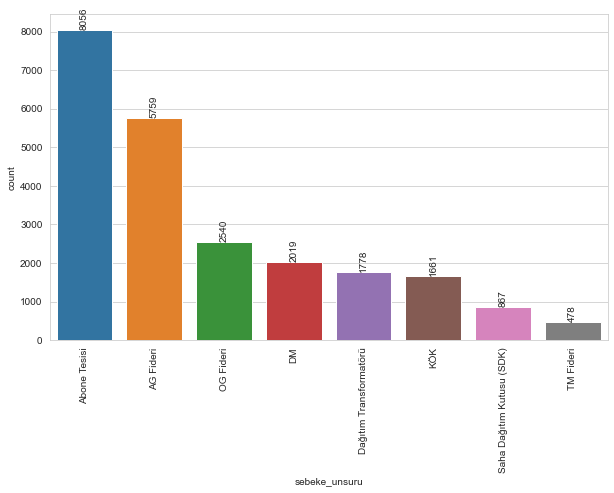

In [44]:
large_to_small = df.groupby('sebeke_unsuru').size().sort_values().index[::-1]
ax = sns.countplot(data=df, x="sebeke_unsuru", order=large_to_small)

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container, rotation = 90);

### **<span style='color:coral'> sebeke_unsuru_kodu </span>** 

Kesinti kaydı açılırken kesintinin olduğu şebeke unsuru kodudur.

In [45]:
df.sebeke_unsuru_kodu.value_counts(dropna=False)

ÇAMLIK DM 35-17-M00173_ZEYTİNDAĞ-1 M08_66328132                18
ÜÇYOL KÖK 45-82-M00128_MENTEŞE M04_2329339                     17
BEYDERE KÖK 45-71-M00128_ESKİ KARAAĞAÇLI M07_50217162          15
MENDERES DM-2/TR-1 35-22-M00300_KÖYLER-1 M15_2095712           15
TR-1/3 45-83-M00003_PAŞATIMARI TR-1 M05_2331761                14
                                                               ..
YAYAKENT TR-8 35-24-M00008_955233217_955233217                  1
K-482 KOMPETAN OTOMOTİV ÖZEL TR 35-02-K00482Ö_ K02_2066005      1
ARDIÇ MAHALLESİ TR-52 35-21-L00132_953366392_953366392          1
KOVALIK SULAMA TR-2 35-16-M00257_47432517_56399650_56399650     1
M-1106 35-01-M01106_35-01-M01106_2375816                        1
Name: sebeke_unsuru_kodu, Length: 18666, dtype: Int64

In [46]:
df.sebeke_unsuru_kodu.nunique()

18666

> this column serves as equipment ID of outage node?

### **<span style='color:coral'> kesinti_nedenine_iliskin_aciklama </span>** 

Açılan kesinti kaydında liste içerisinden CRM sorumlusu tarafından seçilen kesinti nedenidir.

In [47]:
df.kesinti_nedenine_iliskin_aciklama.value_counts(dropna=False)

AG Havai Branşman Arızası                 4347
OG Fider Açması                           4204
AG Pano Kol Sigorta Atığı                 3979
AG Box / Sdk Abone Çıkış Sigorta Atığı    1439
AG Branşman Yeraltı Kablo Arızası         1388
                                          ... 
Müteahhit Çalışması                          3
OG Travers Arızası                           2
Şebeke Bakım Çalışması                       2
OG Trafo Kademe Ayarı                        2
Yangın Sonucu Şebeke Hasarı                  1
Name: kesinti_nedenine_iliskin_aciklama, Length: 62, dtype: Int64

In [49]:
df.kesinti_nedenine_iliskin_aciklama.nunique()

62

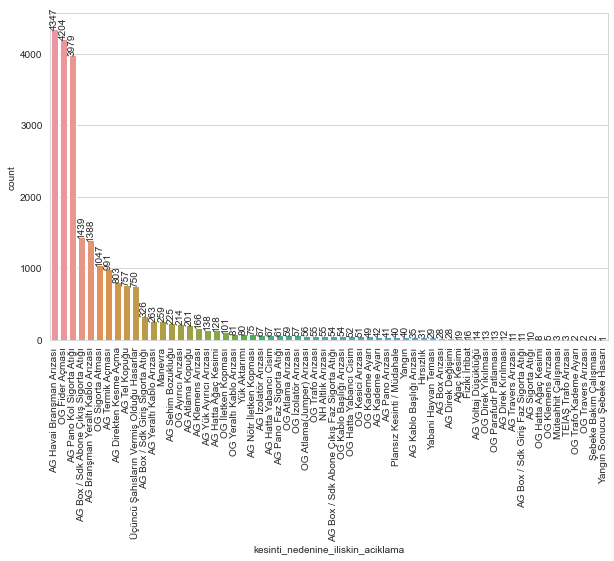

In [50]:
large_to_small = df.groupby('kesinti_nedenine_iliskin_aciklama').size().sort_values().index[::-1]
ax = sns.countplot(data=df, x="kesinti_nedenine_iliskin_aciklama", order=large_to_small)

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container, rotation = 90);

> details of outage cause. Top 3 values constitute 54% of all

### **<span style='color:coral'> kaynaga_gore </span>** 

Kesintinin yaşandığı hattın tipini belirtir. Dağıtım-OG / Dağıtım-AG / İletim seçenekleri arasından seçilir.

In [51]:
df.kaynaga_gore.value_counts(dropna=False)

Dağıtım-AG    16461
Dağıtım-OG     6604
İletim           93
Name: kaynaga_gore, dtype: Int64

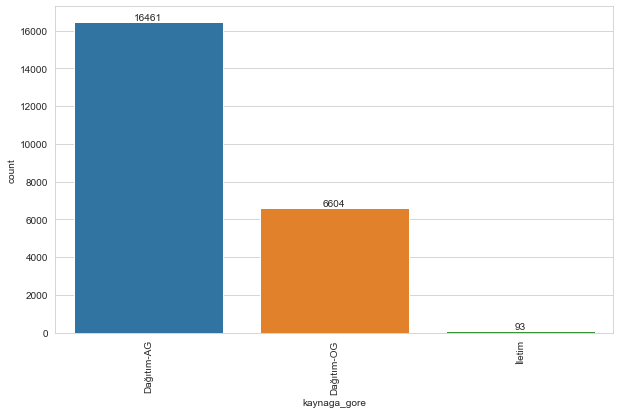

In [52]:
ax = sns.countplot(data=df, x="kaynaga_gore")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

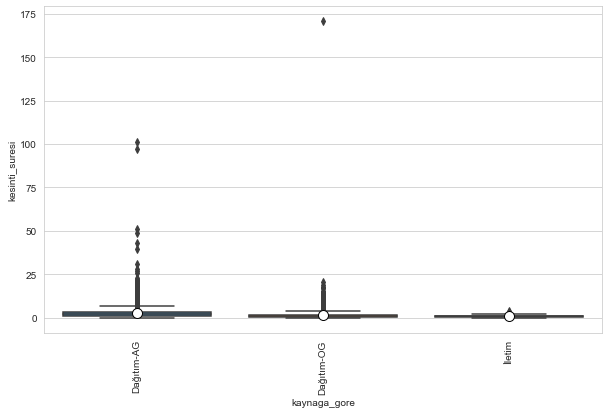

In [74]:
# plotting kesinti_suresi by kaynaga_gore to see extreme values
ax = sns.boxplot(data=df, 
            y="kesinti_suresi",
            x="kaynaga_gore",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

### **<span style='color:coral'> sureye_gore </span>** 

Belirlenmiş kısıta istinaden, kesinti süresinin uzun/kısa olduğunu belirtir.

In [53]:
df.sureye_gore.value_counts(dropna=False)

Uzun    22703
Kısa      455
Name: sureye_gore, dtype: Int64

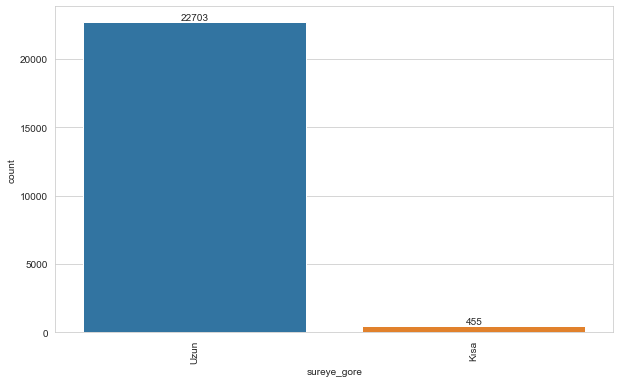

In [54]:
ax = sns.countplot(data=df, x="sureye_gore")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

> **Long duration** of outage is dominant

### **<span style='color:coral'> sebebe_gore </span>** 

Dışsal / Güvenlik / Şebeke İşletmecisi seçeneklerinden seçilir.

In [55]:
df.sebebe_gore.value_counts(dropna=False)

Şebeke işletmecisi    22708
Dışsal                  425
Güvenlik                 25
Name: sebebe_gore, dtype: Int64

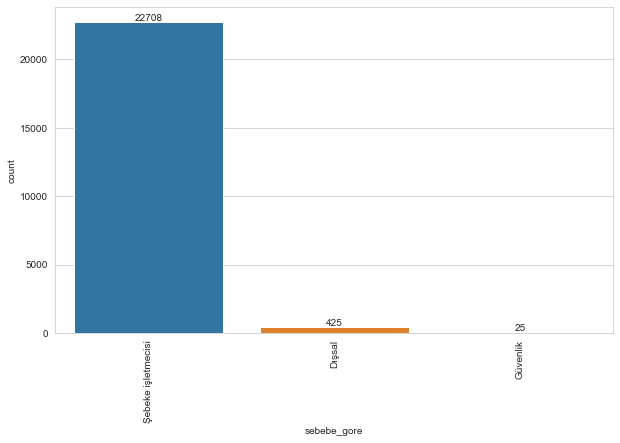

In [56]:
ax = sns.countplot(data=df, x="sebebe_gore")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

### **<span style='color:coral'> bildirime_gore </span>** 

Kesinti kaydının oluşturulurken çağrı ile bildirilerek veya bildirilmeden kaydının açıldığını belirtir.

In [57]:
df.bildirime_gore.value_counts(dropna=False)

Bildirimsiz    23158
Name: bildirime_gore, dtype: Int64

> good to drop this column since it has only one value

### **<span style='color:coral'> baslama_tarihi_ve_zamani </span>** 

Kesinti kaydının Tedarik Sürekliliği Kayıt Sistemi (TSKS) sisteminde kaydının açıldığı ve kesintinin başladığını belirten tarih/saattir.

In [58]:
df.baslama_tarihi_ve_zamani.value_counts(dropna=False)

15.01.2022 09:41:36    3
21.01.2022 12:07:00    2
13.01.2022 13:17:53    2
20.05.2021 19:25:58    2
02.06.2021 11:19:55    2
                      ..
03.05.2021 13:08:35    1
12.09.2021 09:55:59    1
20.09.2021 21:51:00    1
07.05.2021 07:26:00    1
24.05.2021 16:32:00    1
Name: baslama_tarihi_ve_zamani, Length: 23100, dtype: Int64

In [59]:
df.baslama_tarihi_ve_zamani.dtype

string[python]

> need conversion from str to datetime

In [60]:
# converting from string to datetime format
df.baslama_tarihi_ve_zamani = pd.to_datetime(df.baslama_tarihi_ve_zamani)
df.baslama_tarihi_ve_zamani

0       2022-01-24 12:00:49
1       2021-07-18 08:56:42
2       2021-11-27 15:21:40
3       2021-05-16 22:01:00
4       2021-09-16 02:28:15
                ...        
23153   2021-06-28 20:04:58
23154   2022-01-01 22:01:09
23155   2022-06-01 11:25:27
23156   2021-10-15 13:47:00
23157   2021-05-24 16:32:00
Name: baslama_tarihi_ve_zamani, Length: 23158, dtype: datetime64[ns]

In [61]:
df.baslama_tarihi_ve_zamani.dtype

dtype('<M8[ns]')

In [63]:
df.baslama_tarihi_ve_zamani.sort_values()

2391    2021-01-05 00:33:39
2807    2021-01-05 00:48:17
6791    2021-01-05 01:03:31
22293   2021-01-05 02:20:13
7285    2021-01-05 02:40:37
                ...        
19487   2022-09-06 21:47:15
485     2022-09-06 21:51:27
22670   2022-09-06 22:43:35
21279   2022-09-06 23:07:21
979     2022-09-06 23:40:57
Name: baslama_tarihi_ve_zamani, Length: 23158, dtype: datetime64[ns]

> outages from Jan 2021 to Sep 2022

### **<span style='color:coral'> sona_erme_tarihi_ve_zamani </span>** 

Kesinti kaydı adına açılan iş emrinin INFOR EAM (Kurumsal Varlık Yönetim Sistemi)'de atanan saha ekibi tarafından kapatıldığı tarih/saati belirtir.

In [64]:
df.sona_erme_tarihi_ve_zamani.value_counts(dropna=False)

13.05.2021 18:28:51    2
15.10.2021 22:20:00    2
04.01.2022 14:57:18    2
14.01.2022 20:19:00    2
24.01.2022 18:10:43    2
                      ..
17.02.2022 09:55:33    1
17.10.2021 20:12:50    1
28.06.2021 20:21:22    1
01.01.2022 22:58:53    1
24.05.2021 17:05:49    1
Name: sona_erme_tarihi_ve_zamani, Length: 23133, dtype: Int64

In [65]:
df.sona_erme_tarihi_ve_zamani.dtype

string[python]

> need conversion from str to datetime

In [66]:
# converting from string to datetime format
df.sona_erme_tarihi_ve_zamani = pd.to_datetime(df.sona_erme_tarihi_ve_zamani)
df.sona_erme_tarihi_ve_zamani

0       2022-01-24 15:29:34
1       2021-07-18 20:24:30
2       2021-11-27 17:42:52
3       2021-05-16 22:24:16
4       2021-09-16 02:40:43
                ...        
23153   2021-06-28 20:21:22
23154   2022-01-01 22:58:53
23155   2022-06-01 12:46:25
23156   2021-10-15 15:52:52
23157   2021-05-24 17:05:49
Name: sona_erme_tarihi_ve_zamani, Length: 23158, dtype: datetime64[ns]

In [67]:
df.sona_erme_tarihi_ve_zamani.dtype

dtype('<M8[ns]')

In [69]:
df.sona_erme_tarihi_ve_zamani.sort_values()

2391    2021-01-05 00:48:11
2807    2021-01-05 01:08:42
6791    2021-01-05 01:47:40
22293   2021-01-05 03:20:22
7285    2021-01-05 05:29:48
                ...        
17320   2022-10-04 00:16:55
2545    2022-10-04 01:03:00
22971   2022-10-06 00:12:05
979     2022-10-06 01:26:40
22670   2022-10-06 03:06:31
Name: sona_erme_tarihi_ve_zamani, Length: 23158, dtype: datetime64[ns]

> outages from Jan 2021 to Oct 2022

### **<span style='color:coral'> kesinti_suresi </span>** 

Matematiksel olarak "SONA_ERME_TARİHİ_VE_ZAMANI" - "BAŞLAMA_TARİHİ_VE_ZAMANI"'dır. Kesintinin açıldıktan sonra ilgili kesinti adına INFOR EAM'de açılan iş emrinin kapatıldığı an arasında geçen süreyi `saat` cinsinden belirten değerdir.

Duration of outage (hours)

In [70]:
df.kesinti_suresi.value_counts(dropna=False)

0.008    48
0.011    42
0.006    29
0.014    25
0.017    17
         ..
4.427     1
0.163     1
2.296     1
8.156     1
4.082     1
Name: kesinti_suresi, Length: 13220, dtype: int64

In [71]:
#Checking the statistical values
df.kesinti_suresi.describe()

count   23158.000
mean        2.348
std         2.615
min         0.002
25%         0.957
50%         1.720
75%         3.017
max       170.722
Name: kesinti_suresi, dtype: float64

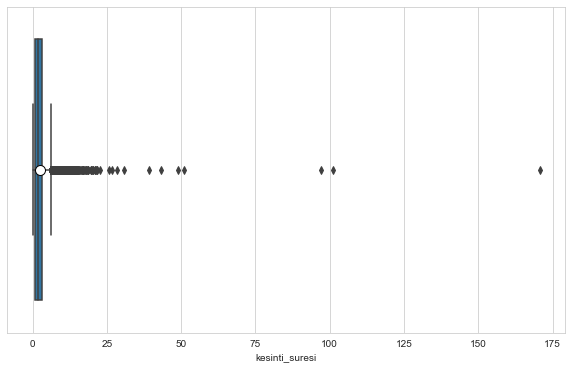

In [72]:
# Checking the boxplot to see extreme values
sns.boxplot(data=df, 
            x="kesinti_suresi",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

> so many extreme values

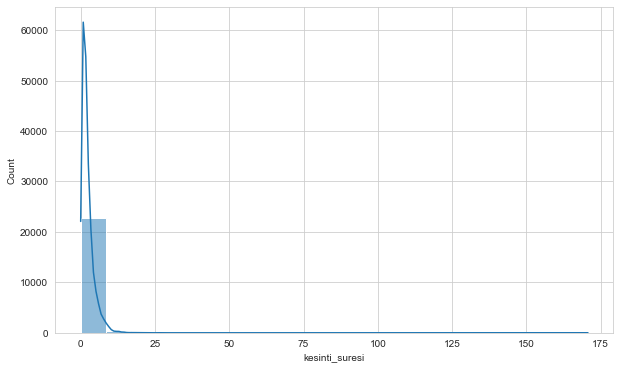

In [73]:
# Checking the histplot/kdeplot to see distribution of feature
sns.histplot(data=df, x="kesinti_suresi", bins=20, kde=True);

>Positively-skewed distribution, right-tail.

### **<span style='color:coral'> kentsel_og </span>** 

Tüm illerin merkez mahalleleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 50 000 (elli bin) ve üzerinde` olan ilçelerin merkez mahallelerinin `orta gerilim kesinti hat sayısı`.

In [75]:
df.kentsel_og.value_counts(dropna=False)

0      18588
1        990
2        203
5        156
4        155
       ...  
99         1
337        1
547        1
269        1
97         1
Name: kentsel_og, Length: 250, dtype: int64

> 18588 count for '0' 

In [76]:
df.kentsel_og.nunique()

250

> high number of unique values

### **<span style='color:coral'> kentsel_ag </span>** 

Tüm illerin merkez mahalleleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 50 000 (elli bin) ve üzerinde` olan ilçelerin merkez mahallelerinin `alçak gerilim kesinti hat sayısı`.

In [77]:
df.kentsel_ag.value_counts(dropna=False)

0       6642
1       3351
2        879
3        543
4        384
        ... 
2819       1
4087       1
5168       1
7760       1
5094       1
Name: kentsel_ag, Length: 1940, dtype: int64

In [78]:
df.kentsel_ag.nunique()

1940

> high number of unique values

### **<span style='color:coral'> kentalti_og </span>** 

Kentsel olmayan ilçelerin merkez mahalleleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 2 000 (iki bin) ve üzerinde` olan mahallelerinin `orta gerilim kesinti hat sayısı`.

In [79]:
df.kentalti_og.value_counts(dropna=False)

0      22010
1        224
2        119
3         75
4         74
       ...  
54         1
605        1
358        1
245        1
125        1
Name: kentalti_og, Length: 103, dtype: int64

In [80]:
df.kentalti_og.nunique()

103

> high number of unique values

### **<span style='color:coral'> kentalti_ag </span>** 

Kentsel olmayan ilçelerin merkez mahalleleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 2 000 (iki bin) ve üzerinde` olan mahallelerinin `alçak gerilim kesinti hat sayısı`.

In [81]:
df.kentalti_ag.value_counts(dropna=False)

0       19230
1        1051
2         262
3          98
5          73
        ...  
780         1
4755        1
2032        1
210         1
803         1
Name: kentalti_ag, Length: 607, dtype: int64

In [82]:
df.kentalti_ag.nunique()

607

> high number of unique values

### **<span style='color:coral'> kirsal_og </span>** 

Kentsel olmayan ilçelerin merkez mahalleleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre n`üfusu 2 000 (iki bin)in altında` olan mahallelerinin `orta gerilim hat sayısı`.

In [83]:
df.kirsal_og.value_counts(dropna=False)

0      21470
1        353
2        139
3        106
5         73
       ...  
88         1
90         1
78         1
203        1
258        1
Name: kirsal_og, Length: 152, dtype: int64

In [85]:
df.kirsal_og.nunique()

152

> high number of unique values

### **<span style='color:coral'> kirsal_ag </span>** 

Kentsel olmayan ilçelerin merkez mahallleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 2 000 (iki bin)in altında` olan mahallelerinin `alçak gerilim hat sayısı`.

In [86]:
df.kirsal_ag.value_counts(dropna=False)

0       19382
1         664
2         140
4          66
3          65
        ...  
959         1
148         1
2136        1
476         1
482         1
Name: kirsal_ag, Length: 710, dtype: int64

In [87]:
df.kirsal_ag.nunique()

710

> high number of unique values

### **<span style='color:coral'> toplam_kentsel_og </span>** 

Birimi `saat`tir.Tüm illerin merkez mahalleleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 50 000 (elli bin) ve üzerinde` olan ilçelerin merkez mahallelerinin `orta gerilim` kesinti hatlarındaki `toplam kesinti süresi`.

In [88]:
df.toplam_kentsel_og.value_counts(dropna=False)

0.000     18588
0.033         6
0.067         4
0.089         3
1.094         3
          ...  
2.962         1
92.346        1
8.458         1
9.133         1
12.087        1
Name: toplam_kentsel_og, Length: 4370, dtype: int64

In [89]:
df.toplam_kentsel_og.nunique()

4370

> high number of unique values

### **<span style='color:coral'> toplam_kentsel_ag </span>** 

Birimi `saat`tir.Tüm illerin merkez mahalleleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 50 000 (elli bin) ve üzerinde` olan ilçelerin merkez mahallelerinin `alçak gerilim` kesinti hatlarındaki `toplam kesinti süresi`.

In [90]:
df.toplam_kentsel_ag.value_counts(dropna=False)

0.000       6642
0.017          7
0.178          6
0.025          5
1.432          4
            ... 
1415.082       1
92.639         1
310.866        1
172.154        1
37.760         1
Name: toplam_kentsel_ag, Length: 15743, dtype: int64

In [91]:
df.toplam_kentsel_ag.nunique()

15743

> high number of unique values

### **<span style='color:coral'> toplam_kentalti_og </span>** 

Birimi `saat`tir.Kentsel olmayan ilçelerin merkez mahallleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 2 000 (iki bin) ve üzerinde` olan mahallelerinin `orta gerilim` kesinti hatlarındaki `toplam kesinti süresi`.

In [92]:
df.toplam_kentalti_og.value_counts(dropna=False)

0.000     22010
0.025         5
0.011         5
0.042         4
0.125         4
          ...  
8.587         1
0.707         1
10.135        1
0.763         1
0.314         1
Name: toplam_kentalti_og, Length: 1092, dtype: int64

In [93]:
df.toplam_kentalti_og.nunique()

1092

> high number of unique values

### **<span style='color:coral'> toplam_kentalti_ag </span>** 

Birimi `saat`tir.Kentsel olmayan ilçelerin merkez mahallleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 2 000 (iki bin) ve üzerinde` olan mahallelerinin `alçak gerilim` kesinti hatlarındaki `toplam kesinti süresi`.

In [94]:
df.toplam_kentalti_ag.value_counts(dropna=False)

0.000      19230
1.304          3
0.278          3
1.117          3
2.234          3
           ...  
387.848        1
115.000        1
59.156         1
71.115         1
91.035         1
Name: toplam_kentalti_ag, Length: 3854, dtype: int64

In [95]:
df.toplam_kentalti_ag.nunique()

3854

> high number of unique values

### **<span style='color:coral'> toplam_kirsal_og </span>** 

Birimi `saat`tir.Kentsel olmayan ilçelerin merkez mahallleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 2 000 (iki bin)in altında` olan mahallelerinin `orta gerilim` kesinti hatlarındaki `toplam kesinti süresi`.

In [96]:
df.toplam_kirsal_og.value_counts(dropna=False)

0.000      21470
0.033          6
0.300          5
0.067          5
0.050          5
           ...  
0.219          1
160.942        1
2.134          1
10.015         1
1.127          1
Name: toplam_kirsal_og, Length: 1603, dtype: int64

In [97]:
df.toplam_kirsal_og.nunique()

1603

> high number of unique values

### **<span style='color:coral'> toplam_kirsal_ag </span>** 

Birimi `saat`tir.Kentsel olmayan ilçelerin merkez mahallleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 2 000 (iki bin)in altında` olan mahallelerinin alçak gerilim kesinti hatlarındaki `toplam kesinti süresi`.

In [98]:
df.toplam_kirsal_ag.value_counts(dropna=False)

0.000      19382
1.842          3
2.338          2
2.356          2
1.909          2
           ...  
1.062          1
42.422         1
217.449        1
485.893        1
12.234         1
Name: toplam_kirsal_ag, Length: 3731, dtype: int64

In [99]:
df.toplam_kirsal_ag.nunique()

3731

> high number of unique values

### **<span style='color:coral'> cagri_count </span>** 

In [100]:
df.cagri_count.value_counts(dropna=False)

0.000      14363
1.000       3645
2.000       1251
3.000        656
4.000        445
           ...  
431.000        1
123.000        1
129.000        1
110.000        1
590.000        1
Name: cagri_count, Length: 201, dtype: int64

In [101]:
df.cagri_count.nunique()

201

In [102]:
df.cagri_count.describe()

count   23158.000
mean        4.071
std        28.210
min         0.000
25%         0.000
50%         0.000
75%         1.000
max      1217.000
Name: cagri_count, dtype: float64

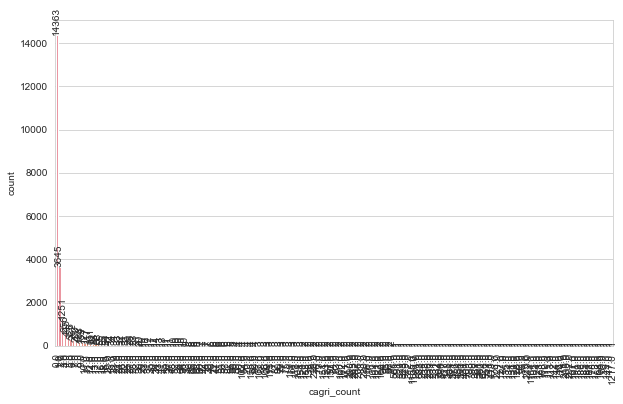

In [103]:
large_to_small = df.groupby('cagri_count').size().sort_values().index[::-1]
ax = sns.countplot(data=df, x="cagri_count", order=large_to_small)

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container, rotation = 90);

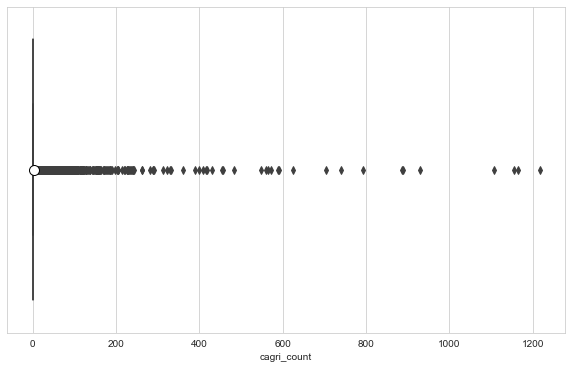

In [104]:
# Checking the boxplot to see extreme values
sns.boxplot(data=df, 
            x="cagri_count",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

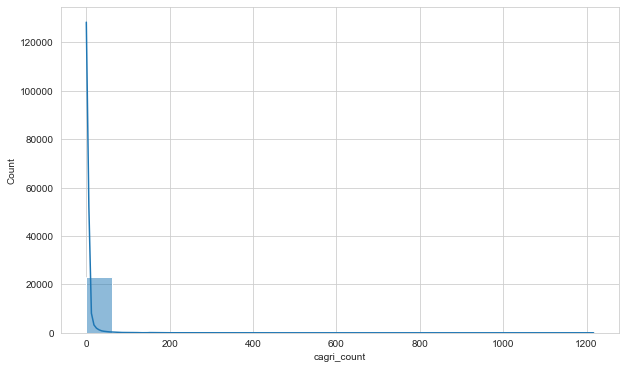

In [105]:
# Checking the histplot/kdeplot to see distribution of feature
sns.histplot(data=df, x="cagri_count", bins=20, kde=True);

In [149]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 23158  │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 26     │ │ float64     │ 8     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 7     │                                                          │
│                                │ datetime64  │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name          ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0       ┃ p25      ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ kesinti_no           │   0 │     0 │  2100000 │  180000 │  1800000 │  1900000 │ 2200000 │ 2300000 │ █▂▁▂█▅ │  │
│ │ kesinti_suresi       │   0 │     0 │      2.3 │     2.6 │   0.0019 │     0.96 │       3 │     170 │   █    │  │
│ │ kentsel_og           │   0 │     0 │      7.3 │      34 │        0 │        0 │       0 │     900 │   █    │  │
│ │ kentsel_ag           │   0 │     0 │      350 │    1700 │        0 │        0 │      88 │   48000 │   █    │  │
│ │ kentalti_og          │   0 │     0 │     0.99 │      11 │        0 │        0 │       0 │     730 │   █    │  │
│ │ kentalti_ag          │   0 │     0 │       47 │     460 │        0 │        0 │       0 │   24000 │   █    │  │
│ │ kirsal_og            │   0 │     0 │      1.9 │      14 │        0 │        0 │       0 │     450 │   █    │  │
│ │ kirsal_ag            │   0 │     0 │       50 │     310 │        0 │        0 │       0 │   12000 │   █    │  │
│ │ toplam_kentsel_og    │   0 │     0 │      7.4 │      49 │        0 │        0 │       0 │    2200 │   █    │  │
│ │ toplam_kentsel_ag    │   0 │     0 │      310 │    1500 │        0 │        0 │     130 │   66000 │   █    │  │
│ │ toplam_kentalti_og   │   0 │     0 │     0.78 │      11 │        0 │        0 │       0 │     830 │   █    │  │
│ │ toplam_kentalti_ag   │   0 │     0 │       36 │     380 │        0 │        0 │       0 │   31000 │   █    │  │
│ │ toplam_kirsal_og     │   0 │     0 │      1.6 │      18 │        0 │        0 │       0 │    1400 │   █    │  │
│ │ toplam_kirsal_ag     │   0 │     0 │       41 │     300 │        0 │        0 │       0 │   13000 │   █    │  │
│ │ cagri_count          │   0 │     0 │      4.1 │      28 │        0 │        0 │       1 │    1200 │   █    │  │
│ └──────────────────────┴─────┴───────┴──────────┴─────────┴──────────┴──────────┴─────────┴─────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA  ┃ NA %   ┃ first                   ┃ last                    ┃ frequency   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ baslama_tarihi_ve_za      │   0 │      0 │   2021-01

## Reading the **Submission** Data

In [108]:
df2 = pd.read_csv("case2_submission.csv")
df_sub = df2.copy()

In [109]:
df_sub.head()

,KESİNTİ_NO,cagri_count
0,2096681,NaN
1,1821877,NaN
2,1883134,NaN
3,2182572,NaN
4,2253558,NaN


Cleaning column names with `skimpy.clean_columns`

In [110]:
df_sub = clean_columns(df_sub)
print(df_sub.columns)

1 column names have been cleaned

Index(['kesinti_no', 'cagri_count'], dtype='object')


In [111]:
df_sub.shape

(5790, 2)

In [112]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790 entries, 0 to 5789
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   kesinti_no   5790 non-null   int64  
 1   cagri_count  0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 90.6 KB


## Reading the **Weather** Data

### **<span style='color:turquoise'> Humidity </span>** 

unit = `[0:1]`

In [113]:
df3 = pd.read_csv("Weather_Bagil-Nem.csv")
df_hum = df3.copy()

In [114]:
df_hum.head()

,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla
0,2021-02-01 00:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 01:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 02:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 03:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 04:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
df_hum.shape

(38832, 17)

In [116]:
df_hum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38832 entries, 0 to 38831
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tarih      38832 non-null  object 
 1   İzmir      11784 non-null  float64
 2   Aliağa     11784 non-null  float64
 3   Çeşme      38832 non-null  float64
 4   Bergama    11784 non-null  float64
 5   Manisa     38832 non-null  float64
 6   Akhisar    38832 non-null  float64
 7   Salihli    11784 non-null  float64
 8   Çiğli      11784 non-null  float64
 9   Menderes   11784 non-null  float64
 10  Alaşehir   11472 non-null  float64
 11  Demirci    11472 non-null  float64
 12  Güzelyalı  38520 non-null  float64
 13  Kula       11472 non-null  float64
 14  Ödemiş     11472 non-null  float64
 15  Soma       11472 non-null  float64
 16  Urla       11472 non-null  float64
dtypes: float64(16), object(1)
memory usage: 5.0+ MB


In [117]:
skim(df_hum)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 38832  │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA       ┃ NA %   ┃ mean      ┃ sd        ┃ p0  ┃ p25     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ İzmir            │    27000 │     70 │    0.0067 │    0.0027 │   0 │   0.005 │   0.009 │   0.015 │  ▁▄█▅▃  │  │
│ │ Aliağa           │    27000 │     70 │    0.0084 │    0.0036 │   0 │   0.006 │    0.01 │   0.017 │ ▁▄█▆▃▂  │  │
│ │ Çeşme            │        0 │      0 │      0.48 │      0.34 │   0 │   0.014 │    0.75 │       1 │ █ ▂▆▇▂  │  │
│ │ Bergama          │    27000 │     70 │    0.0067 │    0.0028 │   0 │   0.005 │   0.009 │   0.018 │  ▁▆█▅▁  │  │
│ │ Manisa           │        0 │      0 │      0.42 │      0.32 │   0 │   0.008 │     0.7 │       1 │ █▁▄▅▅▂  │  │
│ │ Akhisar          │        0 │      0 │      0.43 │      0.33 │   0 │   0.008 │    0.71 │       1 │ █▂▃▅▅▂  │  │
│ │ Salihli          │    27000 │     70 │    0.0066 │    0.0031 │   0 │   0.004 │   0.008 │   0.019 │  ▃█▇▃   │  │
│ │ Çiğli            │    27000 │     70 │    0.0083 │    0.0042 │   0 │   0.005 │    0.01 │   0.019 │ ▃▄█▃▂▂  │  │
│ │ Menderes         │    27000 │     70 │    0.0063 │    0.0027 │   0 │   0.004 │   0.008 │   0.014 │  ▂▄█▅▂  │  │
│ │ Alaşehir         │    27000 │     70 │    0.0062 │    0.0027 │   0 │   0.004 │   0.008 │   0.016 │  ▂█▆▅▂  │  │
│ │ Demirci          │    27000 │     70 │    0.0055 │    0.0024 │   0 │   0.004 │   0.007 │   0.013 │  ▃▇█▆▃  │  │
│ │ Güzelyalı        │      310 │    0.8 │      0.41 │       0.3 │   0 │   0.009 │    0.66 │       1 │ █▁▅▆▅▁  │  │
│ │ Kula             │    27000 │     70 │     0.006 │    0.0025 │   0 │   0.004 │   0.008 │   0.016 │  ▂█▅▅▁  │  │
│ │ Ödemiş           │    27000 │     70 │     0.006 │    0.0025 │   0 │   0.004 │   0.008 │   0.015 │  ▁▄█▃▂  │  │
│ │ Soma             │    27000 │     70 │    0.0062 │    0.0026 │   0 │   0.004 │   0.008 │   0.015 │  ▁▅█▄▂  │  │
│ │ Urla             │    27000 │     70 │    0.0098 │    0.0034 │   0 │   0.008 │   0.012 │   0.019 │  ▃█▅▂▂  │  │
│ └──────────────────┴──────────┴────────┴───────────┴───────────┴─────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tarih                     │       0 │          0 │                            2 │                    78000 │  │
│ └───────────────────────────┴─────────┴────────────┴──

### **<span style='color:turquoise'> Cloud </span>** 

unit = `[0:1]`

In [118]:
df4 = pd.read_csv("Weather_Bulutluluk-Orani.csv")
df_cloud = df4.copy()

In [119]:
df_cloud.head()

,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla
0,2021-02-01 00:00:00,0.640,0.240,0.560,0.440,0.240,0.320,0.000,0.680,0.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 01:00:00,0.680,0.320,0.533,0.320,0.307,0.360,0.160,0.707,0.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 02:00:00,0.720,0.400,0.507,0.200,0.373,0.400,0.320,0.733,0.493,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 03:00:00,0.560,0.640,0.320,0.240,0.480,0.320,0.360,0.560,0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 04:00:00,0.627,0.693,0.360,0.267,0.573,0.467,0.467,0.627,0.347,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df_cloud.shape

(38832, 17)

In [121]:
df_cloud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38832 entries, 0 to 38831
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tarih      38832 non-null  object 
 1   İzmir      11784 non-null  float64
 2   Aliağa     11784 non-null  float64
 3   Çeşme      38832 non-null  float64
 4   Bergama    11784 non-null  float64
 5   Manisa     38832 non-null  float64
 6   Akhisar    38832 non-null  float64
 7   Salihli    11784 non-null  float64
 8   Çiğli      11784 non-null  float64
 9   Menderes   11784 non-null  float64
 10  Alaşehir   11472 non-null  float64
 11  Demirci    11472 non-null  float64
 12  Güzelyalı  38520 non-null  float64
 13  Kula       11472 non-null  float64
 14  Ödemiş     11472 non-null  float64
 15  Soma       11472 non-null  float64
 16  Urla       11472 non-null  float64
dtypes: float64(16), object(1)
memory usage: 5.0+ MB


In [122]:
skim(df_cloud)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 38832  │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA        ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25   ┃ p75     ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ İzmir              │     27000 │      70 │    0.22 │    0.31 │    0 │     0 │    0.43 │    0.92 │  █▁▁▁▁▁  │  │
│ │ Aliağa             │     27000 │      70 │    0.18 │    0.29 │    0 │     0 │    0.28 │    0.92 │  █▁▁▁▁▁  │  │
│ │ Çeşme              │         0 │       0 │    0.25 │     0.3 │    0 │     0 │     0.4 │       1 │  █▂▁▁▁▁  │  │
│ │ Bergama            │     27000 │      70 │     0.2 │     0.3 │    0 │     0 │    0.36 │    0.92 │  █▁▁▁▁▁  │  │
│ │ Manisa             │         0 │       0 │     0.3 │    0.32 │    0 │     0 │    0.53 │       1 │  █▂▁▂▁▂  │  │
│ │ Akhisar            │         0 │       0 │    0.28 │    0.32 │    0 │     0 │     0.5 │       1 │  █▂▁▁▁▁  │  │
│ │ Salihli            │     27000 │      70 │    0.19 │    0.29 │    0 │     0 │    0.31 │    0.96 │  █▁▁▁▁▁  │  │
│ │ Çiğli              │     27000 │      70 │    0.19 │    0.31 │    0 │     0 │    0.32 │    0.92 │  █▁▁▁▁▁  │  │
│ │ Menderes           │     27000 │      70 │     0.2 │     0.3 │    0 │     0 │    0.32 │       1 │  █▁▁▁▁▁  │  │
│ │ Alaşehir           │     27000 │      70 │    0.16 │    0.27 │    0 │     0 │    0.24 │    0.92 │  █▁▁▁▁▁  │  │
│ │ Demirci            │     27000 │      70 │    0.23 │    0.32 │    0 │     0 │    0.44 │    0.96 │  █▁▁▁▁▂  │  │
│ │ Güzelyalı          │       310 │     0.8 │    0.26 │    0.32 │    0 │     0 │    0.48 │       1 │  █▂▁▁▁▁  │  │
│ │ Kula               │     27000 │      70 │    0.22 │    0.31 │    0 │     0 │    0.43 │    0.96 │  █▁▁▁▁▁  │  │
│ │ Ödemiş             │     27000 │      70 │     0.2 │     0.3 │    0 │     0 │    0.36 │    0.96 │  █▁▁▁▁▁  │  │
│ │ Soma               │     27000 │      70 │    0.24 │    0.33 │    0 │     0 │    0.48 │    0.96 │  █▁▁▁▁▂  │  │
│ │ Urla               │     27000 │      70 │    0.18 │    0.29 │    0 │     0 │    0.29 │    0.92 │  █▁▁▁▁▁  │  │
│ └────────────────────┴───────────┴─────────┴─────────┴─────────┴──────┴───────┴─────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tarih                     │       0 │          0 │                            2 │                    78000 │  │
│ └───────────────────────────┴─────────┴────────────┴──

In [123]:
pd.concat([df_hum, df_cloud], axis=1)

,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla
0,2021-02-01 00:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01 00:00:00,0.640,0.240,0.560,0.440,0.240,0.320,0.000,0.680,0.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 01:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01 01:00:00,0.680,0.320,0.533,0.320,0.307,0.360,0.160,0.707,0.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 02:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01 02:00:00,0.720,0.400,0.507,0.200,0.373,0.400,0.320,0.733,0.493,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 03:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01 03:00:00,0.560,0.640,0.320,0.240,0.480,0.320,0.360,0.560,0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 04:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01 04:00:00,0.627,0.693,0.360,0.267,0.573,0.467,0.467,0.627,0.347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38827,2021-01-31 19:00:00,NaN,NaN,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,2021-01-31 19:00:00,NaN,NaN,0.000,NaN,0.053,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
38828,2021-01-31 20:00:00,NaN,NaN,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,2021-01-31 20:00:00,NaN,NaN,0.000,NaN,0.027,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
38829,2021-01-31 21:00:00,NaN,NaN,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,2021-01-31 21:00:00,NaN,NaN,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
38830,2021-01-31 22:00:00,NaN,NaN,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,2021-01-31 22:00:00,NaN,NaN,0.147,NaN,0.040,0.080,NaN,NaN,NaN,NaN,NaN,0.107,NaN,NaN,NaN,NaN


### **<span style='color:turquoise'> Radiation </span>** 

unit = `w/m²`

In [124]:
df5 = pd.read_csv("Weather_Radyasyon.csv")
df_rad = df5.copy()

In [125]:
df_rad.head()

,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla,Unnamed: 17
0,2021-02-01 00:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 01:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 02:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 03:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 04:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df_rad.shape

(38832, 18)

In [127]:
df_rad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38832 entries, 0 to 38831
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tarih        38832 non-null  object 
 1   İzmir        11784 non-null  float64
 2   Aliağa       11784 non-null  float64
 3   Çeşme        38832 non-null  float64
 4   Bergama      11784 non-null  float64
 5   Manisa       38832 non-null  float64
 6   Akhisar      38832 non-null  float64
 7   Salihli      11784 non-null  float64
 8   Çiğli        11784 non-null  float64
 9   Menderes     11784 non-null  float64
 10  Alaşehir     11472 non-null  float64
 11  Demirci      11472 non-null  float64
 12  Güzelyalı    38520 non-null  float64
 13  Kula         11472 non-null  float64
 14  Ödemiş       11472 non-null  float64
 15  Soma         11472 non-null  float64
 16  Urla         11472 non-null  float64
 17  Unnamed: 17  24 non-null     float64
dtypes: float64(17), object(1)
memory usage: 5.3+ M

In [128]:
skim(df_rad)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 38832  │ │ float64     │ 17    │                                                          │
│ │ Number of columns │ 18     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA        ┃ NA %     ┃ mean    ┃ sd     ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ İzmir              │     27000 │       70 │     210 │    280 │    0 │      0 │    400 │     970 │  █▁▁▁▁▁  │  │
│ │ Aliağa             │     27000 │       70 │     210 │    280 │    0 │      0 │    400 │     970 │  █▁▁▁▁▁  │  │
│ │ Çeşme              │         0 │        0 │     210 │    290 │    0 │      0 │    390 │    1200 │  █▁▁▁▁   │  │
│ │ Bergama            │     27000 │       70 │     200 │    280 │    0 │      0 │    390 │     970 │  █▁▁▁▁▁  │  │
│ │ Manisa             │         0 │        0 │     200 │    280 │    0 │      0 │    370 │    1000 │  █▁▁▁▁▁  │  │
│ │ Akhisar            │         0 │        0 │     200 │    280 │    0 │      0 │    380 │    1000 │  █▁▁▁▁▁  │  │
│ │ Salihli            │     27000 │       70 │     200 │    280 │    0 │      0 │    380 │     980 │  █▁▁▁▁▁  │  │
│ │ Çiğli              │     27000 │       70 │     210 │    280 │    0 │      0 │    390 │     970 │  █▁▁▁▁▁  │  │
│ │ Menderes           │     27000 │       70 │     210 │    290 │    0 │      0 │    400 │     980 │  █▁▁▁▁▁  │  │
│ │ Alaşehir           │     27000 │       70 │     210 │    280 │    0 │      0 │    400 │     990 │  █▁▁▁▁▁  │  │
│ │ Demirci            │     27000 │       70 │     210 │    280 │    0 │      0 │    390 │     990 │  █▁▁▁▁▁  │  │
│ │ Güzelyalı          │       310 │      0.8 │     210 │    290 │    0 │      0 │    390 │    1000 │  █▁▁▁▁▁  │  │
│ │ Kula               │     27000 │       70 │     210 │    280 │    0 │      0 │    400 │     990 │  █▁▁▁▁▁  │  │
│ │ Ödemiş             │     27000 │       70 │     210 │    290 │    0 │      0 │    400 │    1000 │  █▁▁▁▁▁  │  │
│ │ Soma               │     27000 │       70 │     200 │    280 │    0 │      0 │    380 │     970 │  █▁▁▁▁▁  │  │
│ │ Urla               │     27000 │       70 │     210 │    290 │    0 │      0 │    400 │     970 │  █▁▁▁▁▁  │  │
│ │ Unnamed: 17        │     39000 │      100 │       0 │      0 │    0 │      0 │      0 │       0 │      █   │  │
│ └────────────────────┴───────────┴──────────┴─────────┴────────┴──────┴────────┴────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tarih                     │       0 │          0 │  

### **<span style='color:turquoise'> Wind Speed </span>** 

unit = `m/s`

In [129]:
df6 = pd.read_csv("Weather_Ruzgar-Hizi.csv")
df_ws = df6.copy()

In [130]:
df_ws.head()

,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla
0,2021-02-01 00:00:00,5.171,8.368,12.943,0.905,0.921,1.905,3.142,9.162,2.894,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 01:00:00,5.357,8.827,13.499,1.078,1.025,1.980,3.294,9.380,3.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 02:00:00,5.545,9.287,14.057,1.253,1.140,2.055,3.447,9.606,3.141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 03:00:00,5.597,8.979,13.960,0.837,1.325,1.701,3.911,9.755,2.880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 04:00:00,5.442,9.777,14.307,0.725,1.297,1.807,3.848,9.759,2.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df_ws.shape

(38832, 17)

In [132]:
df_ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38832 entries, 0 to 38831
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tarih      38832 non-null  object 
 1   İzmir      11784 non-null  float64
 2   Aliağa     11784 non-null  float64
 3   Çeşme      38832 non-null  float64
 4   Bergama    11784 non-null  float64
 5   Manisa     38832 non-null  float64
 6   Akhisar    38832 non-null  float64
 7   Salihli    11784 non-null  float64
 8   Çiğli      11784 non-null  float64
 9   Menderes   11784 non-null  float64
 10  Alaşehir   11472 non-null  float64
 11  Demirci    11472 non-null  float64
 12  Güzelyalı  38520 non-null  float64
 13  Kula       11472 non-null  float64
 14  Ödemiş     11472 non-null  float64
 15  Soma       11472 non-null  float64
 16  Urla       11472 non-null  float64
dtypes: float64(16), object(1)
memory usage: 5.0+ MB


In [133]:
skim(df_ws)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 38832  │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA       ┃ NA %    ┃ mean    ┃ sd      ┃ p0       ┃ p25    ┃ p75   ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ İzmir             │    27000 │      70 │     2.6 │     1.4 │    0.054 │    1.5 │   3.5 │     10 │   ▇█▄▁   │  │
│ │ Aliağa            │    27000 │      70 │     4.5 │     2.5 │    0.048 │    2.7 │   6.2 │     14 │  ▄█▅▃▁   │  │
│ │ Çeşme             │        0 │       0 │       5 │       3 │        0 │    2.6 │   6.9 │     18 │   ▆█▅▂   │  │
│ │ Bergama           │    27000 │      70 │     2.8 │     1.8 │    0.044 │    1.3 │   4.1 │     10 │   █▆▄▂   │  │
│ │ Manisa            │        0 │       0 │     1.6 │     1.1 │        0 │   0.81 │   2.2 │      8 │   █▆▂    │  │
│ │ Akhisar           │        0 │       0 │     2.4 │     1.7 │        0 │    1.1 │   3.3 │     14 │   █▄▁    │  │
│ │ Salihli           │    27000 │      70 │     1.7 │    0.97 │    0.004 │   0.99 │   2.3 │    6.9 │   ▆█▃▁   │  │
│ │ Çiğli             │    27000 │      70 │     3.6 │       2 │    0.043 │    2.1 │   4.8 │     14 │   ▆█▄▁   │  │
│ │ Menderes          │    27000 │      70 │     2.8 │     1.6 │     0.04 │    1.4 │   3.8 │     11 │   ██▅▁   │  │
│ │ Alaşehir          │    27000 │      70 │     1.4 │    0.92 │    0.003 │   0.65 │   1.9 │    6.1 │   █▆▃▁   │  │
│ │ Demirci           │    27000 │      70 │     1.7 │    0.87 │    0.015 │    1.1 │   2.2 │    7.3 │   ▅█▂    │  │
│ │ Güzelyalı         │      310 │     0.8 │     2.7 │     1.4 │        0 │    1.6 │   3.6 │     12 │   ▆█▃    │  │
│ │ Kula              │    27000 │      70 │     1.9 │     1.1 │     0.02 │    1.1 │   2.4 │    8.7 │   ▇█▂    │  │
│ │ Ödemiş            │    27000 │      70 │     1.4 │    0.73 │    0.028 │   0.88 │   1.8 │    5.8 │   ▅█▃▁   │  │
│ │ Soma              │    27000 │      70 │       2 │     1.2 │     0.02 │      1 │   2.9 │    7.7 │   █▇▅▂   │  │
│ │ Urla              │    27000 │      70 │       4 │     2.4 │    0.018 │    2.1 │   5.7 │     14 │   ▇█▆▂   │  │
│ └───────────────────┴──────────┴─────────┴─────────┴─────────┴──────────┴────────┴───────┴────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tarih                     │       0 │          0 │                            2 │                    78000 │  │
│ └───────────────────────────┴─────────┴────────────┴──

### **<span style='color:turquoise'> Wind Direction </span>** 

unit = `rad`, clock-wise starting from north

In [134]:
df7 = pd.read_csv("Weather_Ruzgar-Yonu.csv")
df_wd = df7.copy()

In [135]:
df_wd.head()

,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla
0,2021-02-01 00:00:00,2.590,2.764,2.852,1.023,2.399,1.963,3.051,2.815,2.312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 01:00:00,2.570,2.749,2.839,0.967,2.285,1.980,3.047,2.787,2.258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 02:00:00,2.551,2.735,2.828,0.926,2.192,1.995,3.043,2.760,2.209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 03:00:00,2.709,2.834,2.829,0.979,2.888,2.403,3.185,2.855,2.458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 04:00:00,2.674,2.853,2.849,1.216,2.749,2.265,3.134,2.836,2.442,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
df_wd.shape

(38832, 17)

In [137]:
df_wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38832 entries, 0 to 38831
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tarih      38832 non-null  object 
 1   İzmir      11784 non-null  float64
 2   Aliağa     11784 non-null  float64
 3   Çeşme      38832 non-null  float64
 4   Bergama    11784 non-null  float64
 5   Manisa     38832 non-null  float64
 6   Akhisar    38832 non-null  float64
 7   Salihli    11784 non-null  float64
 8   Çiğli      11784 non-null  float64
 9   Menderes   11784 non-null  float64
 10  Alaşehir   11472 non-null  float64
 11  Demirci    11472 non-null  float64
 12  Güzelyalı  38520 non-null  float64
 13  Kula       11472 non-null  float64
 14  Ödemiş     11472 non-null  float64
 15  Soma       11472 non-null  float64
 16  Urla       11472 non-null  float64
dtypes: float64(16), object(1)
memory usage: 5.0+ MB


In [138]:
skim(df_wd)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 38832  │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA       ┃ NA %    ┃ mean    ┃ sd     ┃ p0       ┃ p25     ┃ p75   ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ İzmir             │    27000 │      70 │     2.4 │      2 │    0.001 │    0.52 │   3.7 │    6.3 │  █▃▃▂▁▃  │  │
│ │ Aliağa            │    27000 │      70 │     2.2 │    1.7 │        0 │    0.72 │   3.4 │    6.3 │  █▄▂▂▂▁  │  │
│ │ Çeşme             │        0 │       0 │     2.6 │    2.2 │        0 │    0.38 │   4.1 │    6.3 │  █▁▃▃▁▄  │  │
│ │ Bergama           │    27000 │      70 │     1.8 │    1.7 │    0.001 │    0.73 │   3.5 │    6.3 │  █▁ ▂▁▁  │  │
│ │ Manisa            │        0 │       0 │     2.4 │    1.7 │        0 │    0.86 │   3.8 │    6.3 │  █▅▃▄▃▂  │  │
│ │ Akhisar           │        0 │       0 │     2.7 │    2.2 │        0 │    0.46 │   4.9 │    6.3 │  █▃▂▂▂▅  │  │
│ │ Salihli           │    27000 │      70 │     3.2 │    1.8 │    0.001 │     1.4 │   4.8 │    6.3 │  ▄█▂▄▇▅  │  │
│ │ Çiğli             │    27000 │      70 │     2.5 │    2.1 │        0 │     0.6 │   4.3 │    6.3 │  █▃▃▂▁▄  │  │
│ │ Menderes          │    27000 │      70 │     2.4 │    2.2 │        0 │    0.33 │   4.3 │    6.3 │  █▂▂▂▁▄  │  │
│ │ Alaşehir          │    27000 │      70 │     3.5 │    1.8 │    0.001 │     2.1 │   5.3 │    6.3 │  ▃▄▇▂▄█  │  │
│ │ Demirci           │    27000 │      70 │     2.3 │      2 │        0 │    0.58 │     4 │    6.3 │  █▂▂▂▁▃  │  │
│ │ Güzelyalı         │      310 │     0.8 │     2.9 │      2 │        0 │    0.83 │   4.9 │    6.3 │  █▃▆▂▄▆  │  │
│ │ Kula              │    27000 │      70 │     2.8 │    1.8 │        0 │     1.4 │   4.7 │    6.3 │  ▃█▂▁▅▂  │  │
│ │ Ödemiş            │    27000 │      70 │     2.5 │    2.1 │        0 │    0.57 │   4.5 │    6.3 │  █▅▂▂▃▃  │  │
│ │ Soma              │    27000 │      70 │     1.7 │    1.8 │        0 │    0.38 │   2.7 │    6.3 │  █▂▂▁▁▁  │  │
│ │ Urla              │    27000 │      70 │     2.6 │    2.2 │        0 │    0.32 │   4.7 │    6.3 │  █▁▃▂▁▄  │  │
│ └───────────────────┴──────────┴─────────┴─────────┴────────┴──────────┴─────────┴───────┴────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tarih                     │       0 │          0 │                            2 │                    78000 │  │
│ └───────────────────────────┴─────────┴────────────┴──

### **<span style='color:turquoise'> Temperature </span>** 

unit = `Celcius`

In [139]:
df8 = pd.read_csv("Weather_Sicaklik.csv")
df_temp = df8.copy()

In [140]:
df_temp.head()

,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla
0,2021-02-01 00:00:00,10.357,13.682,16.307,6.082,5.957,5.007,5.907,13.857,7.682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 01:00:00,10.142,13.692,16.317,5.859,6.059,4.942,6.409,13.709,7.309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 02:00:00,9.928,13.703,16.328,5.636,6.161,4.878,6.911,13.561,6.936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 03:00:00,11.461,14.811,17.236,6.561,8.611,7.061,9.286,14.811,7.811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 04:00:00,10.800,14.816,16.999,6.583,8.199,6.150,9.150,14.516,7.433,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
df_temp.shape

(12528, 17)

In [142]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tarih      12528 non-null  object 
 1   İzmir      12528 non-null  float64
 2   Aliağa     11784 non-null  float64
 3   Çeşme      12528 non-null  float64
 4   Bergama    11784 non-null  float64
 5   Manisa     12528 non-null  float64
 6   Akhisar    12528 non-null  float64
 7   Salihli    11784 non-null  float64
 8   Çiğli      11784 non-null  float64
 9   Menderes   11784 non-null  float64
 10  Alaşehir   11088 non-null  float64
 11  Demirci    11088 non-null  float64
 12  Güzelyalı  11088 non-null  float64
 13  Kula       11088 non-null  float64
 14  Ödemiş     11088 non-null  float64
 15  Soma       11088 non-null  float64
 16  Urla       11088 non-null  float64
dtypes: float64(16), object(1)
memory usage: 1.6+ MB


In [143]:
skim(df_temp)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 12528  │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA      ┃ NA %    ┃ mean    ┃ sd     ┃ p0      ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ İzmir              │       0 │       0 │      15 │    8.8 │    -5.8 │      9 │     22 │      38 │  ▁▅█▆▄▁  │  │
│ │ Aliağa             │     740 │     5.9 │      16 │    7.6 │    -2.9 │     11 │     22 │      35 │  ▁▅█▇▅▁  │  │
│ │ Çeşme              │       0 │       0 │      17 │    6.2 │     1.9 │     13 │     22 │      34 │  ▁▅█▅▄▁  │  │
│ │ Bergama            │     740 │     5.9 │      15 │    9.5 │    -9.4 │    8.2 │     22 │      40 │  ▁▅█▆▄▁  │  │
│ │ Manisa             │       0 │       0 │      14 │    9.7 │     -11 │    6.9 │     21 │      41 │  ▁▅█▆▄▁  │  │
│ │ Akhisar            │       0 │       0 │      14 │    9.9 │     -12 │    6.6 │     21 │      41 │  ▁▅█▆▄▁  │  │
│ │ Salihli            │     740 │     5.9 │      14 │    9.2 │    -9.8 │    6.8 │     20 │      37 │  ▁▅██▅▁  │  │
│ │ Çiğli              │     740 │     5.9 │      16 │    8.3 │    -6.3 │     11 │     23 │      37 │  ▁▄█▇▅▂  │  │
│ │ Menderes           │     740 │     5.9 │      15 │    9.6 │    -8.4 │    8.6 │     22 │      41 │  ▁▅█▆▄▁  │  │
│ │ Alaşehir           │    1400 │      11 │      14 │    9.9 │     -12 │    6.6 │     21 │      40 │  ▁▅██▄▁  │  │
│ │ Demirci            │    1400 │      11 │      11 │    9.8 │     -15 │    4.3 │     18 │      37 │  ▁▄█▇▄▁  │  │
│ │ Güzelyalı          │    1400 │      11 │      16 │    8.8 │    -5.8 │    9.6 │     23 │      38 │  ▁▅█▆▄▁  │  │
│ │ Kula               │    1400 │      11 │      13 │     10 │     -14 │    5.8 │     20 │      39 │  ▁▄█▇▄▁  │  │
│ │ Ödemiş             │    1400 │      11 │      15 │    9.3 │      -8 │    7.9 │     21 │      40 │  ▁▅█▇▄▁  │  │
│ │ Soma               │    1400 │      11 │      14 │    9.5 │      -9 │    7.2 │     21 │      40 │  ▁▅█▇▄▁  │  │
│ │ Urla               │    1400 │      11 │      17 │    7.7 │    -2.4 │     11 │     23 │      37 │  ▁▅█▇▄▁  │  │
│ └────────────────────┴─────────┴─────────┴─────────┴────────┴─────────┴────────┴────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tarih                     │       0 │          0 │                            2 │                    25000 │  │
│ └───────────────────────────┴─────────┴────────────┴──

### **<span style='color:turquoise'> Precipitation </span>** 

unit = `kg/m²`

In [144]:
df9 = pd.read_csv("Weather_Yagis.csv")
df_rain = df9.copy()

In [145]:
df_rain.head()

,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla
0,2021-02-01 00:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 01:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 02:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 03:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 04:00:00,0.000,0.000,0.021,0.000,0.000,0.000,0.000,0.000,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
df_rain.shape

(38832, 17)

In [147]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38832 entries, 0 to 38831
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tarih      38832 non-null  object 
 1   İzmir      11784 non-null  float64
 2   Aliağa     11784 non-null  float64
 3   Çeşme      38832 non-null  float64
 4   Bergama    11784 non-null  float64
 5   Manisa     38832 non-null  float64
 6   Akhisar    38832 non-null  float64
 7   Salihli    11784 non-null  float64
 8   Çiğli      11784 non-null  float64
 9   Menderes   11784 non-null  float64
 10  Alaşehir   11472 non-null  float64
 11  Demirci    11472 non-null  float64
 12  Güzelyalı  38520 non-null  float64
 13  Kula       11472 non-null  float64
 14  Ödemiş     11472 non-null  float64
 15  Soma       11472 non-null  float64
 16  Urla       11472 non-null  float64
dtypes: float64(16), object(1)
memory usage: 5.0+ MB


In [148]:
skim(df_rain)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 38832  │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA        ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25   ┃ p75      ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ İzmir             │     27000 │      70 │    0.31 │     1.4 │    0 │     0 │        0 │      31 │    █     │  │
│ │ Aliağa            │     27000 │      70 │    0.31 │     1.2 │    0 │     0 │        0 │      27 │    █     │  │
│ │ Çeşme             │         0 │       0 │    0.15 │    0.78 │    0 │     0 │        0 │      27 │    █     │  │
│ │ Bergama           │     27000 │      70 │    0.31 │     1.2 │    0 │     0 │        0 │      27 │    █     │  │
│ │ Manisa            │         0 │       0 │    0.16 │       1 │    0 │     0 │    0.001 │      41 │    █     │  │
│ │ Akhisar           │         0 │       0 │    0.13 │    0.82 │    0 │     0 │        0 │      50 │    █     │  │
│ │ Salihli           │     27000 │      70 │    0.28 │     1.1 │    0 │     0 │    0.021 │      21 │    █     │  │
│ │ Çiğli             │     27000 │      70 │    0.31 │     1.4 │    0 │     0 │        0 │      31 │    █     │  │
│ │ Menderes          │     27000 │      70 │    0.35 │     1.6 │    0 │     0 │        0 │      36 │    █     │  │
│ │ Alaşehir          │     27000 │      70 │    0.27 │     1.1 │    0 │     0 │        0 │      21 │    █     │  │
│ │ Demirci           │     27000 │      70 │    0.27 │     1.1 │    0 │     0 │    0.042 │      15 │    █     │  │
│ │ Güzelyalı         │       310 │     0.8 │    0.15 │     0.9 │    0 │     0 │        0 │      33 │    █     │  │
│ │ Kula              │     27000 │      70 │    0.27 │     1.1 │    0 │     0 │        0 │      21 │    █     │  │
│ │ Ödemiş            │     27000 │      70 │    0.33 │     1.3 │    0 │     0 │        0 │      24 │    █     │  │
│ │ Soma              │     27000 │      70 │    0.28 │     1.3 │    0 │     0 │        0 │      25 │    █     │  │
│ │ Urla              │     27000 │      70 │     0.3 │     1.4 │    0 │     0 │        0 │      31 │    █     │  │
│ └───────────────────┴───────────┴─────────┴─────────┴─────────┴──────┴───────┴──────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tarih                     │       0 │          0 │                            2 │                    78000 │  │
│ └───────────────────────────┴─────────┴────────────┴──